## Data Preprocessing Part

In [21]:
import pandas as pd

data = pd.read_pickle("C://Users/isang/OneDrive/Desktop/WM/data/LSWMD.pkl")
data.shape

(811457, 6)

In [22]:
data.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [24]:
data['failureType'].map(lambda x: list(x)!=[]).sum()

172950

In [25]:
data_unlabelled = pd.DataFrame()
data_unlabelled = data[data['failureType'].map(lambda x: list(x)==[])]
     
data_unlabelled.shape

(638507, 6)

In [26]:
data_unlabelled.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
35,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,11.0,[],[]
45,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,21.0,[],[]
69,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot3,20.0,[],[]
120,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,21.0,[],[]
158,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2,...",533.0,lot7,9.0,[],[]


In [27]:
data_labelled = pd.DataFrame()
data_labelled = data[data['failureType'].map(lambda x: list(x)!=[])]

print(data_labelled.shape)

data_labelled.head()

(172950, 6)


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [28]:
data_labelled['failureType'] = data_labelled['failureType'].map(lambda x: x[0][0])
data_labelled['trianTestLabel'] = data_labelled['trianTestLabel'].map(lambda x: x[0][0])
data_labelled.rename(columns = {'trianTestLabel':'trainTestLabel'}, inplace = True)

data_labelled.head()

C:\Users\isang\AppData\Local\Temp\ipykernel_26940\3659585696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labelled['failureType'] = data_labelled['failureType'].map(lambda x: x[0][0])
C:\Users\isang\AppData\Local\Temp\ipykernel_26940\3659585696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labelled['trianTestLabel'] = data_labelled['trianTestLabel'].map(lambda x: x[0][0])
C:\Users\isang\AppData\Local\Temp\ipykernel_26940\3659585696.py:3: SettingWithCopyWarning: 
A value is trying to b

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


## Data Analysis Part

In [29]:
number_labelled_data = data_labelled.shape[0]

failure_types = list(pd.unique(data_labelled['failureType']))
failure_types

['none',
 'Loc',
 'Edge-Loc',
 'Center',
 'Edge-Ring',
 'Scratch',
 'Random',
 'Near-full',
 'Donut']

[147431, 3593, 5189, 4294, 9680, 1193, 866, 149, 555]
[0.852, 0.021, 0.03, 0.025, 0.056, 0.007, 0.005, 0.001, 0.003]


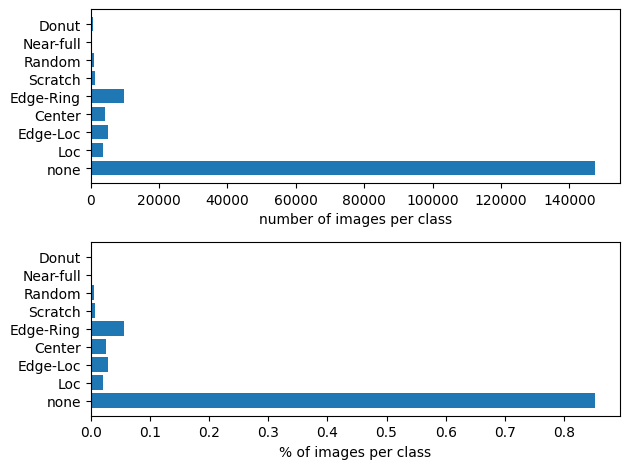

In [30]:
import matplotlib.pyplot as plt

types_image_number = list(map(lambda x: (data_labelled['failureType'] == x).sum(), 
                              failure_types))
print(types_image_number)


types_image_proportion = list(map(lambda x: round(x/number_labelled_data,3), types_image_number))
print(types_image_proportion)


plt.subplot(2,1,1)
plt.barh(failure_types, types_image_number)
plt.xlabel('number of images per class')

plt.subplot(2,1,2)
plt.barh(failure_types, types_image_proportion)
plt.xlabel('% of images per class')

plt.tight_layout()

Text(0.5, 0, 'Images per class')

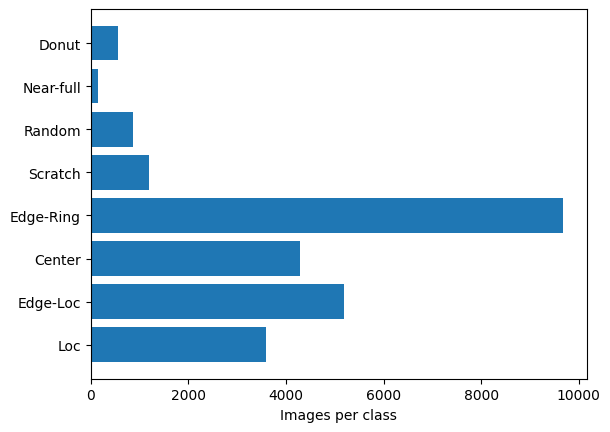

In [31]:
plt.barh(failure_types[1:], types_image_number[1:])
plt.xlabel('Images per class')

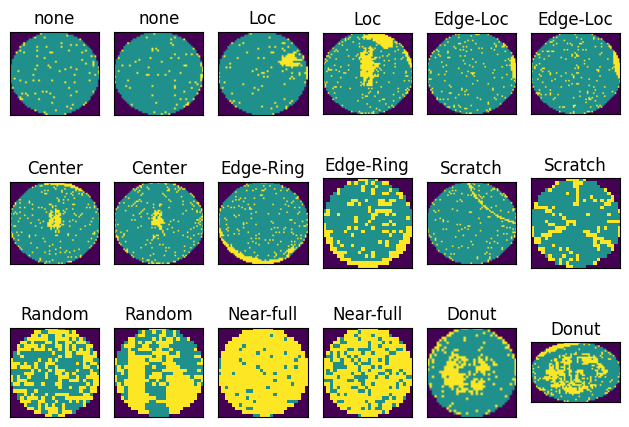

In [32]:
for i in range(len(failure_types)):
  b = 0
  for j in [0,1]:
    if i != 0:
      b=1
    plt.subplot(3,6,(2*i+1)+j)
    plt.imshow(data_labelled['waferMap'][data_labelled['failureType']==failure_types[i]].iloc[j])
    plt.title(failure_types[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

In [33]:
shapes = pd.unique(data_labelled['waferMap'].map(lambda x: x.shape))
print(shapes.shape)

data_labelled['shape'] = data_labelled['waferMap'].map(lambda x: x.shape)

data_labelled.head()

(346,)


C:\Users\isang\AppData\Local\Temp\ipykernel_26940\3547371544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labelled['shape'] = data_labelled['waferMap'].map(lambda x: x.shape)


,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType,shape
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none,"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none,"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none,"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none,"(45, 48)"


In [34]:
import numpy as np

shape_image_number = list()
for shape in shapes:
  shape_image_number.append(
      (shape,np.sum([data_labelled['shape']==shape]))
  )

median_first_dimension =  np.median(list(map(lambda x: x[0][0], shape_image_number)))
median_second_dimension = np.median(list(map(lambda x: x[0][1], shape_image_number)))

median_shape = (int(median_first_dimension), int(median_second_dimension))

print('median first dim.', 'median second dim.')
print(median_first_dimension, '            ', median_second_dimension)

median first dim. median second dim.
53.0              52.0


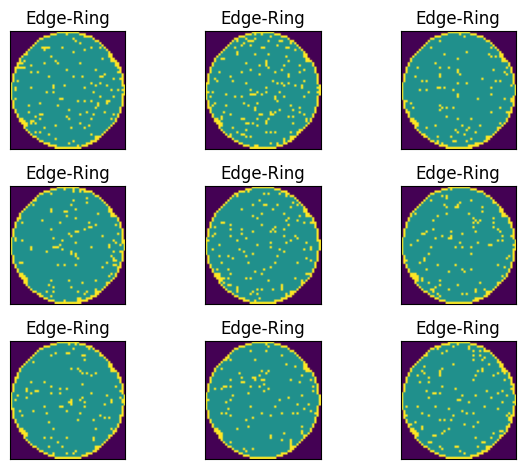

In [35]:
median_images = data_labelled[data_labelled['shape']==median_shape]

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(median_images['waferMap'].iloc[i])
  plt.xticks([])
  plt.yticks([])
  plt.title(median_images['failureType'].iloc[i])

plt.tight_layout()

In [38]:
ratio = 1.5
very_rectangular_shapes = list(filter(lambda x: (x[0][0]/x[0][1]>1.5) or (x[0][1]/x[0][0]>1.5), shape_image_number))
print(len(very_rectangular_shapes))

number_rectangular_per_class = list()

for type_ in failure_types:
  filter1 = data_labelled['failureType'] == type_ 
  data = data_labelled[filter1]
  counter = 0
  for shape in very_rectangular_shapes:
    filter2 = data_labelled['shape'] == shape[0]
    counter += len(data[filter2])
    
  number_rectangular_per_class.append((type_, counter))

print(number_rectangular_per_class)

TypeError: 'Series' object is not callable

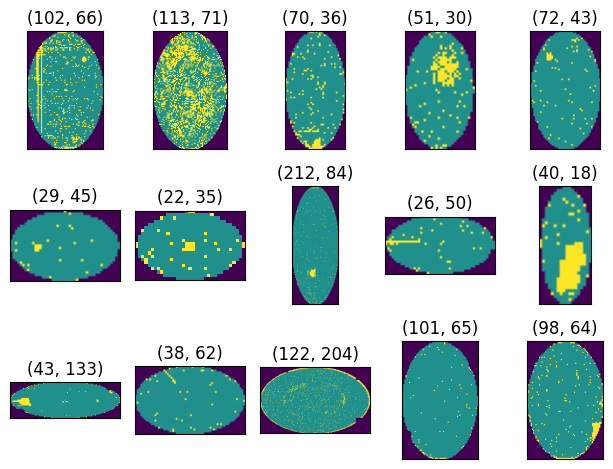

In [ ]:
for i in range(15):
  plt.subplot(3,5,i+1)
  filter = data_labelled['shape']==very_rectangular_shapes[i][0]
  im = data_labelled[filter]['waferMap'].iloc[0]
  plt.imshow(im)
  plt.xticks([])
  plt.yticks([])
  plt.title(data_labelled[filter]['shape'].iloc[0])

plt.tight_layout()

## Data Cleaning Part

In [41]:
data_labelled = data_labelled.reset_index(drop = True)
for shape in very_rectangular_shapes:
  data_labelled = data_labelled[data_labelled['shape'] != shape[0]]

data_labelled = data_labelled.reset_index(drop = True)

shapes = pd.unique(data_labelled['waferMap'].map(lambda x: x.shape))
shapes.shape

(320,)

In [ ]:
shape_image_number = list()
for shape in shapes:
  shape_image_number.append(
      (shape,np.sum([data_labelled['shape']==shape]))
  )

count_pixel = [0]*320

for i in range(len(shapes)):
  area = np.product(shapes[i])
  filtered_data = data_labelled[data_labelled['shape']==shapes[i]]
  count1 = sum(list(map(lambda x: list(x.reshape(area)).count(1),filtered_data['waferMap'])))
  count2 = sum(list(map(lambda x: list(x.reshape(area)).count(2),filtered_data['waferMap'])))
  total_pixel_no_background = count1 + count2
  total_area = shape_image_number[i][1]*area
  if (i%50==0):
    print(area, total_pixel_no_background, total_area)
  count_pixel[i] = total_pixel_no_background/total_area


2160 173352 222480
792 13354 17424
1024 622911 804864
1980 214524 277200
1722 32712 41328
4761 22584 28566
2597 3970 5194


In [44]:
count_pixel[:10]

[0.7791801510248112,
 0.8002602472348731,
 0.7884401203696763,
 0.8123152709359606,
 0.815,
 0.7962832009698024,
 0.7960687960687961,
 0.7753530166880617,
 0.7740959894806049,
 0.7963440860215054]

In [45]:
defect = []
defect2 = []

for i in range(len(data_labelled)):
  if(i%10000==0):
    print(i)
  area = np.product(data_labelled['shape'].iloc[i])
  count1 = list(data_labelled['waferMap'].iloc[i].reshape(area)).count(1)
  count2 = list(data_labelled['waferMap'].iloc[i].reshape(area)).count(2)
  pixel_no_background = count1 + count2
  proportion = pixel_no_background/area
  if(proportion < 0.6):
    defect.append(i)
  if(0.6 <= proportion <= 0.7 ):
    defect2.append(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000


In [48]:
print(len(defect))
print(len(defect2))

22
14


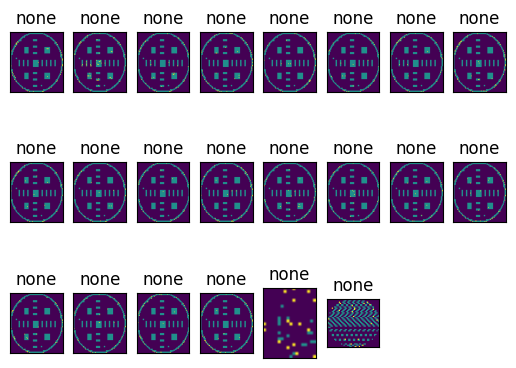

In [49]:
for i in range(len(defect)):
  plt.subplot(3,8,i+1)
  plt.imshow(data_labelled['waferMap'].iloc[defect[i]])
  plt.xticks([])
  plt.yticks([])
  plt.title(data_labelled['failureType'].iloc[defect[i]])

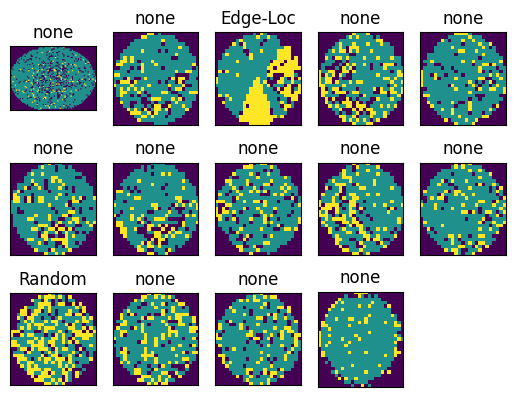

In [50]:
for i in range(len(defect2)):
  plt.subplot(3,5,i+1)
  plt.imshow(data_labelled['waferMap'].iloc[defect2[i]])
  plt.xticks([])
  plt.yticks([])
  plt.title(data_labelled['failureType'].iloc[defect2[i]])

In [52]:
dict_ = {'Indici': defect}  
df = pd.DataFrame(dict_) 
df.to_csv('C://Users/isang/OneDrive/Desktop/WM/data/Indici_immagini_difettose.csv')

In [53]:
to_delete = pd.read_csv("C://Users/isang/OneDrive/Desktop/WM/data/Indici_immagini_difettose.csv")

for el in to_delete['Indici']:
  data_labelled.drop(el, axis = 0, inplace = True)
data_labelled = data_labelled.reset_index(drop = True)
data_labelled.tail()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType,shape
170241,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,Test,Edge-Loc,"(26, 30)"
170242,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,Test,Edge-Loc,"(26, 30)"
170243,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,Test,Edge-Ring,"(26, 30)"
170244,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,Test,Edge-Loc,"(26, 30)"
170245,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,Test,Edge-Ring,"(26, 30)"


In [54]:
import json

result = data_labelled.to_json(orient = "split")
parsed = json.loads(result)

with open('C://Users/isang/OneDrive/Desktop/WM/data/WM811K_clean.json', 'w') as f:
    json.dump(parsed, f)